# Lab05

Modeling Photosynthesis: Part 1

<div class="alert alert-warning">
If figures/tables are not rendered correctly, make sure your notebook is `trusted` by running `Trust Notebook` operation found in `Commands` (third icon from the top on the toolbar located left-hand side). You can easily find this menu by typing in "trust" in the search box there.
</div>

<div class="alert alert-info">
This is a student version of the notebook that some portions of code are redacted with comments like `#= .. =#`. Students are encouraged to complete the code to get same/similar results as rendered in the notebook. A complete version of the notebook will be provided once the lab session is finished each week.
</div>

In [1]:
using Cropbox

### Ex 5.1

Using Cropbox package, create a function that implements the Michaelis-Mention equation as shown in Eqn[5.3] that calculates the rate of biochemical reaction by an enzyme. Use the parameter values provided in Table 5.1. Plot the response of reaction rate ($V$) as a function of substrate concentration ranging from 0 to 1000. For this exercise we will ignore units but imagine that the substrate is CO2 used for carboxylation catalyzed by the enzyme Rubisco.

- Eqn 5.3

$$
\frac{d[P]}{dt} = V = \frac{V_{\mathrm{max}} \cdot [S]}{K_m + [S]}
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $V_{\mathrm{max}}$ | 100 | [Product] / time (*e.g.* $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$) | Potential rate of biochemical reaction for product synthesis (*i.e.* Rubisco capacity) |
| $K_m$ | 400 | [Substrate] (*e.g.* $\mathrm{M}$, $\mathrm{ppm}$, $\mathrm{\mu mol}$ $\mathrm{mol^{-1}}$) | Michaelis-Menten constant where $V = \frac{1}{2} V_{\mathrm{max}}$ |

In [2]:
@system MichaelisMenten(Controller) begin
    Pr(S, Vmax, Km): product_rate => #= ... =#
    S: substrate => #= ... =#
    Vmax: maximum_reaction_rate => #= ... =#
    Km: michaelis_menten_constant => #= ... =#
end

MichaelisMenten

In [3]:
instance(MichaelisMenten)

MichaelisMenten
  context = <Context>
  config = <Config>
  Pr (product_rate) = 0.0
  S (substrate) = 0.0
  Vmax (maximum_reaction_rate) = 100.0
  Km (michaelis_menten_constant) = 400.0

#### Simulation with configuration

By default, `simulate()` can run simulation once for a given configuration set for `config` option. If we want run multiple simulations, we need to specify a list of multiple configurations in `configs` option (note trailing `s`). Cropbox provides a helper macro `@config` to easily generate such a list of multiple configurations for some common scenarios such as changing one parameter over a range of values. Here we want `S` value from 0 to 1000 by 1 (`0:1:1000` or `0:1000` as the step size is 1 by default) which is declared as a built-in range type and later expanded to a list by `!` operator in the front. By the way, system name `:0` in the configuration is a shorthand for the name of whatever top-level system to be used in simulation. This case it is going to be `MichaelisMenten`.

In [4]:
r = simulate(MichaelisMenten; configs=@config(!(:0 => :S => 0:1000)))

Progress: 100%[=========================================] Time: 0:00:01


,tick,Pr,S,Vmax,Km
,Quantit…,Float64,Float64,Float64,Float64
1,0.0 hr,0.0,0.0,100.0,400.0
2,0.0 hr,0.249377,1.0,100.0,400.0
3,0.0 hr,0.497512,2.0,100.0,400.0
4,0.0 hr,0.744417,3.0,100.0,400.0
5,0.0 hr,0.990099,4.0,100.0,400.0
6,0.0 hr,1.23457,5.0,100.0,400.0
7,0.0 hr,1.47783,6.0,100.0,400.0
8,0.0 hr,1.7199,7.0,100.0,400.0
9,0.0 hr,1.96078,8.0,100.0,400.0


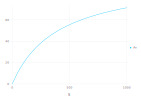

In [5]:
plot(r, :S, :Pr, kind=:line)

We can instead use `visualize()` for automatically calling `plot()` with `simulate()` inside. Good thing is that we don't have to deal with custom expansion of configurations using `@config`, instead we just use convenient opitions like `xstep`. `xstep` option indicates the range of a certain parameter value that need to be simulated over to make a series of consecutive output. Here we change the value of `Km` from 0 to 10 by increment of 0.1 by simplying providing a snippet of range value (`:0 => :Km => 0:0.1:10`) representing we want to run simulations 101 times. You can also use some plotting options like `kind` as we use with `plot()`.

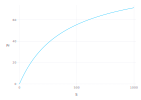

In [6]:
visualize(MichaelisMenten, :S, :Pr;
    xstep = :0 => :S => 0:1000,
    kind = :line,
)

### Ex 5.2

In this exercise, you will answer Q 5.5 using Julia (or R or Python or any computer tool of your choice).
- Get an analytical solution for Eqn[5.4]
- Create a function to get numerical solutions using Gaussian two-point and three-point integration methods.

- Eqn 5.4

$$
\int_0^{\pi} \sin{x} \, dx
$$

#### Analytical solution

In [7]:
f′(x) = sin(x)
f(x) = -cos(x)
f(π) - f(0)

2.0

#### Gaussian two-point integration method

In [8]:
(f′((#= ... =# + 1) / 2 * π) + f′((#= ... =# + 1) / 2 * π)) * π/2

1.9358195746511373

#### Gaussian three-point integration method

In [9]:
(#= ... =# * f′((#= ... =# + 1) / 2 * π) + #= ... =# * f′((#= ... =# + 1)/2 * π) + #= ... =# * f′((#= ... =# + 1) / 2 * π)) * π/2

2.0013889136077436

Calculation of Gaussian quadrature can be more easily done by using a dedicated package called [QuadGK.jl](https://github.com/JuliaMath/QuadGK.jl) which is already imported inside Cropbox.

In [10]:
X, W = Cropbox.QuadGK.gauss(2, 0, pi)
sum(W .* f′.(X))

1.9358195746511364

In [11]:
X, W = Cropbox.QuadGK.gauss(3, 0, pi)
sum(W .* f′.(X))

2.0013889136077427

### Ex 5.3

Using Cropbox package, create a function to predict leaf net photosynthesis ($A$) as a function of irradiance ($I$) that takes parameters of photochemical efficiency ($\alpha$), the maximum photosynthetic rate at saturating light ($A_{\mathrm{max}}$), and dark respiration rate ($R_d$).
- Based on rectangular hyperbola (Eqn[5.11])
- Based on non-rectangular hyperbola (Eqn[5.12] for $0 < \theta \leq 1$)
- Using the parameter values in 5.1, plot the light response curves of both functions from 0 to 2000 μmol m−1 s−2 of photosynthetic photon flux density (PFD).
- Evaluate the sensitivity of non-rectangular hyperbola to $\theta$ graphically.

#### Rectangular hyperbola

- Eqn 5.11

$$
\begin{align}
A_g &= \frac{\alpha I A_{\mathrm{max}}}{\alpha I + A_{\mathrm{max}}} \\
A_n &= A_g - R_d
\end{align}
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $\alpha$ | 0.05 | $\mathrm{\mu mol_{CO_2}}$ $\mathrm{\mu mol_{photon}^{-1}}$ | Apparent photochemical efficiency (*a.k.a.* quantum yield) |
| $A_{\mathrm{max}}$ | 25.0 | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Light saturated $A_g$ at ambient $\mathrm{[CO_2]}$ and standard temperature |
| $R_d$ | 1.0, 40 | $\mathrm{\mu mol_{CO_2}}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Leaf mitochondrial respiration rate at 25 $\mathrm{^{\circ}C}$ |

- Table 5.1

| Symbol | Units | Description |
|:-------|:------|:------------|
| $I$ | $\mathrm{\mu mol_{photon}}$ $\mathrm{m^{-2}}$ | Incident PAR on leaf surface |
| $A_g$ | $\mathrm{\mu mol_{CO_2}}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Leaf gross $\mathrm{CO_2}$ assimilation rate 
| $A_n$ | $\mathrm{\mu mol_{CO_2}}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Leaf net $\mathrm{CO_2}$ assimilation rate |

We first define a mix-in system named `Photosynthesis` which provides a shared structure of photosynthesis model which other models we will make later will be all based on.

We have three common parameters and two variables indicating photosynthesis rate. $A_n$ is net photosynthesis derived from gross photosynthesis ($A_g$) and respiration ($R_d$). As we decided to make $R_d$ a constant parameter, subsequent models would need to provide a definition of $A_g$ only. Although `Ag` is not defined here, it's used by `An` so we need to make a placeholder for it by making a `hold` variable. For declaring `hold`, only name and optinal alias of the variable are needed. Any variables of `hold` kind should be properly defined later in another system which includes `Photosynthesis` as a mix-in.

In [12]:
@system Photosynthesis begin
    α: photochemical_efficiency => 0.05 ~ preserve(parameter)
    Amax: maximum_photosynthetic_rate => 25 ~ preserve(u"μmol/m^2/s", parameter)
    Rd: dark_respiration => 1.0 ~ preserve(u"μmol/m^2/s", parameter)

    Ag: gross_photosynthesis ~ hold

    An(Ag, Rd): net_photosynthesis => Ag - Rd ~ track(u"μmol/m^2/s")
end

Photosynthesis

Here is our first model based on rectangular hyperbola named `PhotosynthesisRH` which consists of two mix-ins, `Photosynthesis` and `Controller`. As you remember, `Controller` is a mix-in that makes a top-level system which can be instantiated by `instance()` or `simulate()`. Note that variables from other mix-in that are used by the system should be declared as `hold` kind of variable to ensure correct bindings between variables. Note that `Ag` for `PhotosynthesisRH` now has a concrete definition by making use of additional parameter `I`.

In [13]:
@system PhotosynthesisRH(Photosynthesis, Controller) begin
    I: irradiance => 0 ~ preserve(u"μmol/m^2/s", parameter)

    Ag(I, α, Amax): gross_photosynthesis => begin
        #= ... =#
    end ~ track(#= ... =#)
end

PhotosynthesisRH

We use `visualize()` with a range of `I` value set up for `xstep` in the same way as we saw earlier.

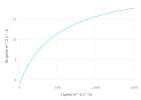

In [14]:
visualize(PhotosynthesisRH, :I, :An, xstep=:0 => :I => 0:1500, kind=:line)

#### Non-rectangular hyperbola

- Eqn 5.12

$$
A_g = \frac{\alpha I + A_{\mathrm{max}} - \sqrt{(\alpha I + A_{\mathrm{max}})^2 - 4\theta\alpha I A_{\mathrm{max}}}}{2\theta} \\
$$

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $\theta$ | 0.7 | - | Curvature determining transition between light-limited and saturated photosynthesis |

Another variant of the model using non-rectangular hyperbola looks similar to the rectangular model we built earlier, except the addition of new parameter `θ` controlling curvature of transition.

In [15]:
@system PhotosynthesisNRH(Photosynthesis, Controller) begin
    θ: transition_curvature => 0.7 ~ preserve(parameter)
    I: irradiance => 0 ~ preserve(u"μmol/m^2/s", parameter)

    Ag(#= ... =#, α, Amax): gross_photosynthesis => begin
        #= ... =#
    end ~ track(#= ... =#)
end

PhotosynthesisNRH

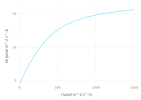

In [16]:
visualize(PhotosynthesisNRH, :I, :An, xstep=:0 => :I => 0:1500, kind=:line)

By the way, instead of solving the quadratic equation for $A_g$ manually as we did above, we can use `solve` variable to let the framework figure it out. In this case, we just need to give Eqn[5.9] as is. When multiple solutions exist, we may need to specify how to choose a solution. Here we use a sensible range for $A_g$ from 0 to $A_{\mathrm{max}}$.

- Eqn 5.9.

$$
\theta A_g^2 - (\alpha I + A_{\mathrm{max}}) A_g + \alpha I A_{\mathrm{max}} = 0
$$

In [17]:
@system PhotosynthesisNRH2(Photosynthesis, Controller) begin
    θ: transition_curvature => 0.7 ~ preserve(parameter)
    I: irradiance => 0 ~ preserve(u"μmol/m^2/s", parameter)

    Ag(Ag, θ, I, α, Amax): gross_photosynthesis => begin
        θ*Ag^2 - (α*I + Amax)*Ag + α*I*Amax
    end ~ solve(u"μmol/m^2/s", lower=0, upper=Amax)
end

PhotosynthesisNRH2

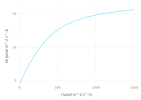

In [18]:
visualize(PhotosynthesisNRH2, :I, :An, xstep=:0 => :I => 0:1500, kind=:line)

#### Sensitivity of θ

So far we've only made plots with one line (or a series of points) composed of multiple simulations by changing `xstep` option. We can also draw multiple lines for non-rectangular hyperbola by changing another parameter value which is set in `group` option. For testing sensitivity of `θ`, we want to run simulations with different values of `θ` from 0.2 to 1.0 by increment of 0.2. For convenience of the reader, we use a reverse order (`1.0:-0.2:0.2`) to show the labels from top to bottom. Additionally, we append a plot for the rectangular hyperbola when `θ` is 0.

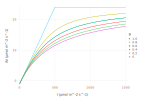

In [19]:
let x = :I, y = :An,
    xstep = :0 => :I => 0:10:1500,
    group = :0 => :θ => 1.0:-0.2:0.2,
    kind = :line
    p = visualize(PhotosynthesisNRH, x, y; group, xstep, kind)
    visualize!(p, PhotosynthesisRH, x, y; xstep, kind, name="0")
end

### Ex 5.4

Using Cropbox, you will evaluate three different systems for modeling instantaneous canopy photosynthesis ($A_{g,\mathrm{can}}$) based on the Appendix (section A.2) of Goudriaan and van Laar (1994) and also Goudriaan (1986):
- Build system based on 1) analytical solution, 2) Gaussian 3 point integration method, and 3) Rectangular integration (Eulerian) method over total LAI ($L$) with an increment ($dl$) = 1.0 and 0.1.
- Reproduce the results shown in  Appendix (section A.2) of Goudriaan and van Laar(1994) for the same conditions
- Plot *gross* canopy photosynthesis ($A_{g,\mathrm{can}}$) to compare the three approaches in response to LAI ranging from 0 to 10
- Plot *net* canopy photosynthesis ($A_{n,\mathrm{can}}$) to compare the three approaches in response to LAI ranging from 0 to 10. Assume that canopy respiration is 10% of $A_{max}$ integrated over the whole canopy. How do the two plots compare?
- Choose one method of integration and experiment with different parameter values for physiological (e.g., $A_{\mathrm{max}}$, $\alpha$, $\theta$) and canopy (e.g., $k$, $L$) traits to evaluate their impacts on canopy productivity. Plot *net* canopy photosynthesis ($A_{n,\mathrm{can}}$) to compare the changes in these parameters and discuss the results.

#### Breaking down the model into components: Irradiance

`Irradiance` system contains code related to the calculation of irradiance. Note that `Ih` and `I` are declared as `call` kind of variable which can be *called* like a regular function. Arguments declared before semi-colon (`;`) indicates the list of its depending variables while keyword arguments declared after semi-colon denotes input arguments that has to be supplied when called. For example, `Ih` depends on `I0` and `k` variables and accepts an argument named `l`. In the declaration of `I`, `Ih` is called with an argument named `l` which is supplied inside parenthesis following the name of variable (`Ih(l)`).

- Eqn 5.13 & 14

$$
\begin{align}
I_h(l) &= I_0 e^{-k l} \\
I(l) &= k \cdot I_h(l) = k \cdot I_0 e^{-k l}
\end{align}
$$

- Table 5.1

| Symbol | Units | Description |
|:-------|:------|:------------|
| $l$ | $\mathrm{m_{leaf}^2}$ $\mathrm{m_{ground}^2}$ | Cumulative leaf area index up to the position of a leaf inside the canopy |
| $I_h(l)$ | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | $I$ incident on a horizontal surface at canopy depth $l$ |
| $I(l)$ | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | $I$ incident on a leaf surface at canopy depth $l$ |

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $I_0$ | 575 | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Irradiance at the top of the canopy |
| $k$ | 0.8 | $\mathrm{m_{ground}^2}$ $\mathrm{m_{leaf}^{-2}}$ | Light extinction coefficient inside the canopy |

In [20]:
@system Irradiance begin
    I0: irradiance_top => #= ... =# ~ preserve(u"μmol/m^2/s", parameter) # equivalent to 125 W m-2 of PAR
    k: extinction_coeff => #= ... =# ~ preserve(u"m/m", parameter)

    Ih(I0, k; l) => I0 * exp(-k*l) ~ call(u"μmol/m^2/s")
    I(Ih, k; l) => k * Ih(l) ~ call(u"μmol/m^2/s")
end

Irradiance

#### Breaking down the model into components: $A_{can}$

`CanopyPhotosynthesis` consists of variables calculated by integrating over a depth of the canopy. Gross photosynthesis (`Ag`) is a kind of `hold` meaning an actual definition of this variable must be supplied by other systems (mix-ins) which will be later merged to form a complete system. Dark respiration (`Rd`) is calculated by the ratio parameter (`Rdp`) whose initial value is 0.1 indiciating 10% of maximum gross photosynthesis (`Amax*L`) assumed for canopy respiration (`Rd`).

- Table 5.1

| Symbol | Units | Description |
|:-------|:------|:------------|
| $L$ | $\mathrm{m_{leaf}^2}$ $\mathrm{m_{ground}^2}$ | Total leaf area index of the canopy |
| $R_d$ | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Canopy respiration rate ($R_d = 0.1 A_{\mathrm{max}}L$) |

- Table 5.1

| Symbol | Value | Units | Description |
|:-------|:------|:------|:------------|
| $\alpha$ | 0.0494 | $\mathrm{\mu mol_{CO_2}}$ $\mathrm{\mu mol_{photon}^{-1}}$ | Apparent photochemical efficiency (*a.k.a.* quantum yield) |
| $A_{\mathrm{max}}$ | 22.73 | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Light saturated $A_g$ at ambient $\mathrm{[CO_2]}$ and standard temperature |

In [21]:
c = :Photosynthesis => (Amax = 22.73, α = 0.0494)

:Photosynthesis => (Amax = 22.73, α = 0.0494)

In [22]:
@system CanopyPhotosynthesis(Photosynthesis) begin
    α: photochemical_efficiency => #= ... =# ~ preserve(u"μmol/μmol", parameter)
    Amax: maximum_photosynthetic_rate => #= ... =# ~ preserve(u"μmol/m^2/s",parameter)

    L: leaf_area_index => 5 ~ preserve(u"m^2/m^2", parameter) # for comparison with Gourdriaan and van Laar (1994)

    Rdp: dark_respiration_ratio => 0.1 ~ preserve(parameter)
    Rd(Rdp, Amax, L): dark_respiration => #= ... =# ~ track(u"μmol/m^2/s")
end

CanopyPhotosynthesis

#### Analytical solution

Now we are defining an anlytical version of the model first. `CanopyPhotosynthesisA` is composed of other systems including `CanopyPhotosynthesis` and `Irradiance` defined above. These mixins provide actual definition of many variables declared to be `hold` here. For example, `α`, `Amax`, and `Rd` `Ag` is provided by this system while other variables are declared to be `hold` meaning provided by other mixins.

- Eqn 5.16

$$
A_{g,\mathrm{can}} = \int_0^L A(l) \, dl = \frac{A_{\mathrm{max}}}{k} \cdot \ln{\frac{A_{\mathrm{max}} + \alpha k I_0}{A_{\mathrm{max}} + \alpha k I_0 e^{-k L}}}
$$

In [23]:
@system CanopyPhotosynthesisA(CanopyPhotosynthesis, Irradiance, Controller) begin
    Ag(α, Amax, I0, k, L): gross_photosynthesis => begin
        #= ... =#
    end ~ track(u"μmol/m^2/s")
end

CanopyPhotosynthesisA

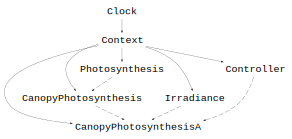

In [24]:
Cropbox.hierarchy(CanopyPhotosynthesisA)

`CanopyPhotosynthesisN` is an intermediate mix-in providing a common ground for Gauss and Euler version of the model. Instead of directly computing `Ag` for the whole canopy, it has a `call` variable `A` for a certain layer defined by leaf area of index (`L`). `A` will be later integrated in a specific method provided by other systems to compute `Ag`.

- Eqn 5.15

$$
A(l) = \frac{\alpha I(l) \cdot A_{\mathrm{max}}}{\alpha I(l) + A_{\mathrm{max}}}
$$

- Table 5.1

| Symbol | Units | Description |
|:-------|:------|:------------|
| $A(l)$ | $\mathrm{\mu mol}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ | Leaf gross $\mathrm{CO_2}$ assimilation rate ($A_g$) of a leaf inside the canopy at depth $l$ |

In [25]:
@system CanopyPhotosynthesisN(CanopyPhotosynthesis, Irradiance, Controller) begin
    A(α, Amax, I; l) => begin
        Il = I(l)
        #= ... =#
    end ~ call(u"μmol/m^2/s")
end

CanopyPhotosynthesisN

#### Gaussian integration

`CanopyPhotosynthesisG` uses Gaussian integration method to compute `Ag` from `A` defined above. We use QuadGK for convenience.

In [26]:
@system CanopyPhotosynthesisG(CanopyPhotosynthesisN, Controller) begin
    Ag(A, L): gross_photosynthesis => begin
        #Cropbox.QuadGK.quadgk(A, 0, L) |> first
        X, W = Cropbox.QuadGK.gauss(3, 0, L)
        sum(W .* A.(X))
    end ~ track(u"μmol/m^2/s")
end

CanopyPhotosynthesisG

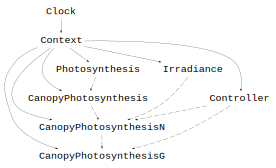

In [27]:
Cropbox.hierarchy(CanopyPhotosynthesisG)

#### Rectangular integration (Eulerian)

`CanopyPhotosynthesisE` uses Euler integration method to compute `Ag`. Overall structure is close to `CanopyPhotosynthesisG` except it uses a parameter `dl` to control the size of integration step.

In [28]:
@system CanopyPhotosynthesisE(CanopyPhotosynthesisN, Controller) begin
    dl => 1.0 ~ preserve(parameter)
    Ag(A, L, dl): gross_photosynthesis => begin
        sum([A(l) * dl for l in dl:dl:L])
    end ~ track(u"μmol/m^2/s")
end

CanopyPhotosynthesisE

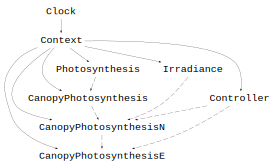

In [29]:
Cropbox.hierarchy(CanopyPhotosynthesisE)

Now it's time to make a plot of three models using the same option. We want to plot gross photosynthesis (`Ag`) against a range of leaf area index (`L`) from 0 to 15. `visualize()` function again conveniently provides a feature to draw a series of simulation lines from multiple systems.

Reproduce the results for three methods and compare them with the values from Gourdriaan and van Laar (1994) p. 181. Their analytical solution was 843.74 and gaussian solution was 844.22 $\mathrm{\mu g}$ $\mathrm{m^{-2}}$ $\mathrm{s^{-1}}$ respectively. Note that 1 $\mathrm{\mu mol_{CO_2}}$ equals to 44 $\mathrm{\mu g_{CO_2}}$.

In [30]:
co2_molar_mass = 44u"μg" / 1u"μmol"

44.0 μg μmol^-1

In [31]:
instance(CanopyPhotosynthesisA).Ag' * co2_molar_mass

843.6887399642918 μg m^-2 s^-1

In [32]:
instance(CanopyPhotosynthesisG).Ag' * co2_molar_mass

844.1622218341407 μg m^-2 s^-1

In [33]:
instance(CanopyPhotosynthesisE).Ag' * co2_molar_mass

618.277857115745 μg m^-2 s^-1

Change $dl$ to 0.1 for the rectangular method.

In [34]:
instance(CanopyPhotosynthesisE, config = :0 => :dl => 0.1).Ag' * co2_molar_mass

819.7431487919014 μg m^-2 s^-1

In [35]:
models = [CanopyPhotosynthesisA, CanopyPhotosynthesisG, CanopyPhotosynthesisE]
xstep = :0 => :L => 0:0.1:10
names = ["Analytic", "Gauss", "Euler"]
kind = :line
ylim = (0, 30);

Note that the line of Gauss model (yellow) is barely visible since it's mostly overlapped by the line of analytic result (blue).

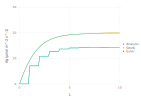

In [36]:
visualize(models, :L, :Ag; xstep, names, kind, ylim)

Plotting net photosynthesis (`An`) which takes out 10% of gross respiration (`Ag`) as dark respiration (`Rd`) can be easily done in a similar way.

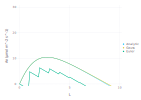

In [37]:
visualize(models, :L, :An; xstep, names, kind, ylim)

Note that Cropbox now implements a new kind of variable named `integrate` to cover the need of numerical integration as we explored in this notebook. Instead of putting two variables seprately, one for `call` defining a function to be integrated and another for `track` manually doing numerical integration, `integrate` can easily describe the same logic in one variable. It takes a similar form as `call` putting the name of internal variable to be integrated (`l` in this case) after semi-colon (`;`) in the argument list. Then the range of integration is specified by `from` and `to` tags defined inside the parenthesis following the state name (`integrate`). As we want to integrate from 0 to `L` and the default value of `from` and `to` are 0, we only need to specify `to` as `L`. As a bonus, unit conversion would be automatically handled if any of these variables were tied with some units. `CanopyPhotosynthesisG2` implemented with `call` should behave in the exactly same way as `CanopyPhotosynthesisG` implemented earlier with `call` and `track`.

In [38]:
@system CanopyPhotosynthesisG2(CanopyPhotosynthesis, Irradiance, Controller) begin
    Ag(α, Amax, I; l): gross_photosynthesis => begin
        Il = I(l)
        α*Il * Amax / (α*Il + Amax)
    end ~ integrate(to=L, u"μmol/m^2/s")
end

CanopyPhotosynthesisG2

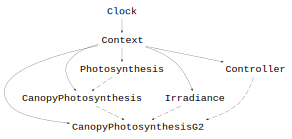

In [39]:
Cropbox.hierarchy(CanopyPhotosynthesisG2)

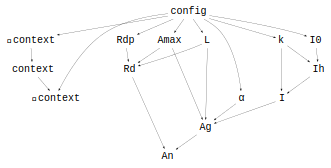

In [40]:
Cropbox.dependency(CanopyPhotosynthesisG2)

In [41]:
instance(CanopyPhotosynthesisG2)

CanopyPhotosynthesisG2
  context = <Context>
  config = <Config>
  α (photochemical_efficiency) = 0.0494
  Amax (maximum_photosynthetic_rate) = 22.73 μmol m^-2 s^-1
  Rd (dark_respiration) = 11.365 μmol m^-2 s^-1
  Ag (gross_photosynthesis) = 19.1747 μmol m^-2 s^-1
  An (net_photosynthesis) = 7.80974 μmol m^-2 s^-1
  L (leaf_area_index) = 5.0
  Rdp (dark_respiration_ratio) = 0.1
  I0 (irradiance_top) = 575.0 μmol m^-2 s^-1
  k (extinction_coeff) = 0.8
  Ih = <call>
  I = <call>

#### Sensitivity of Parameters

We can test sensitivty of parameters as we did earlier.

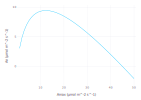

In [42]:
visualize(CanopyPhotosynthesisG2, :Amax, :An;
    xstep = :0 => :Amax => 1:50,
    kind = :line
)

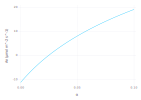

In [43]:
visualize(CanopyPhotosynthesisG2, :α, :An;
    xstep = :0 => :α => 0:0.001:0.1,
    xlim = (0, 0.1),
    kind = :line
)

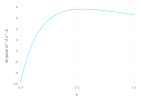

In [44]:
visualize(CanopyPhotosynthesisG2, :k, :An;
    xstep = :0 => :k => 0:0.01:1,
    kind = :line
)

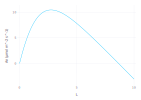

In [45]:
visualize(CanopyPhotosynthesisG2, :L, :An;
    xstep = :0 => :L => 0:0.1:10,
    kind = :line
)

#### Light response of leaf and canopy photosynthesis

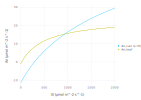

In [46]:
p = visualize(CanopyPhotosynthesisG2, :I0, :An;
    xstep = :0 => :I0 => 0:10:2000,
    kind = :line,
    name = "An,can (L=5)"
)
visualize!(p, PhotosynthesisRH, :I, :An; xstep=:0 => :I => 0:10:2000, kind=:line, name="An,leaf")